In [16]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import time 
import openweathermapy.core as owm
import scipy, pylab



from citipy import citipy

output_data = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


In [17]:
from collections import defaultdict
lat_lng = defaultdict()

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for x in lat_lngs:
    lat, long = x
    city = citipy.nearest_city(lat, long).city_name
    lat_lng[city] = (lat, long)
   

In [18]:
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ['city', 'lat_long']
df['latitude'] = df.lat_long.map(lambda x: str(x[0]))
df['longitude'] = df.lat_long.map(lambda x: str(x[1]))
df.head()

,city,lat_long,latitude,longitude
0,chuy,"(-57.6565173417496, -29.752193844149446)",-57.6565173417496,-29.752193844149446
1,ushuaia,"(-69.81384804152535, -27.3986670145338)",-69.81384804152535,-27.3986670145338
2,punta arenas,"(-88.05443693331239, -117.87186085065362)",-88.05443693331239,-117.87186085065362
3,rikitea,"(-61.648003821018136, -138.2962369935257)",-61.648003821018136,-138.2962369935257
4,tabas,"(33.26394328857883, 55.80814935225047)",33.26394328857883,55.80814935225047


In [19]:
def get_current_weather(df_object):
    api_key = "bcc7f5cb5f80358c534beef5124a9cb4"
    base_url =  "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID': api_key,
        'lat' : df_object.latitude,
        'lon': df_object.longitude,
        'units': 'Imperial'
    }
    data = requests.get(base_url, params = params)
    time.sleep(.50)
    return data.json()

In [20]:
city_data = df.sample(n=500)
city_data['weather_json'] = city_data.apply(get_current_weather, axis=1)
city_data['country'] = city_data.weather_json.map(lambda x: x.get('sys').get('country'))
city_data['temp'] = city_data.weather_json.map(lambda x: x.get('main').get('temp'))
city_data['clouds'] = city_data.weather_json.map(lambda x: x.get('clouds').get('all'))
city_data['humidity'] = city_data.weather_json.map(lambda x: x.get('main').get('humidity'))
city_data['max_temp'] = city_data.weather_json.map(lambda x: x.get('main').get('temp_max'))
city_data['wind_speed'] = city_data.weather_json.map(lambda x: x.get('wind').get('speed'))
city_data['Date'] = city_data.weather_json.map(lambda x: x.get('dt'))
city_data.head()


,city,lat_long,latitude,longitude,weather_json,country,temp,clouds,humidity,max_temp,wind_speed,Date
222,acapulco,"(10.75328362511631, -102.33327714243974)",10.75328362511631,-102.33327714243974,"{'coord': {'lon': -102.33, 'lat': 10.75}, 'wea...",None,81.03,64,100,81.03,11.77,1529532525
326,bria,"(6.834809069687168, 23.614736511730854)",6.834809069687168,23.614736511730854,"{'coord': {'lon': 23.61, 'lat': 6.83}, 'weathe...",CF,70.86,76,91,70.86,3.38,1529532490
594,miyako,"(40.38655105123095, 144.0285339334302)",40.38655105123095,144.0285339334302,"{'coord': {'lon': 144.03, 'lat': 40.39}, 'weat...",None,58.35,92,95,58.35,11.99,1529532491
118,baoding,"(39.216394742721576, 115.61889656164658)",39.216394742721576,115.61889656164658,"{'coord': {'lon': 115.62, 'lat': 39.22}, 'weat...",CN,67.44,0,80,67.44,3.38,1529532528
553,verkhnetulomskiy,"(68.48769071938068, 31.031957545600534)",68.48769071938068,31.031957545600534,"{'coord': {'lon': 31.03, 'lat': 68.49}, 'weath...",RU,50.70,92,100,50.70,2.71,1529532529


In [ ]:
city_data['latitude'] = city_data['latitude'].astype(float)
type(city_data['latitude'].values[0])
dep_var = city_data['latitude']


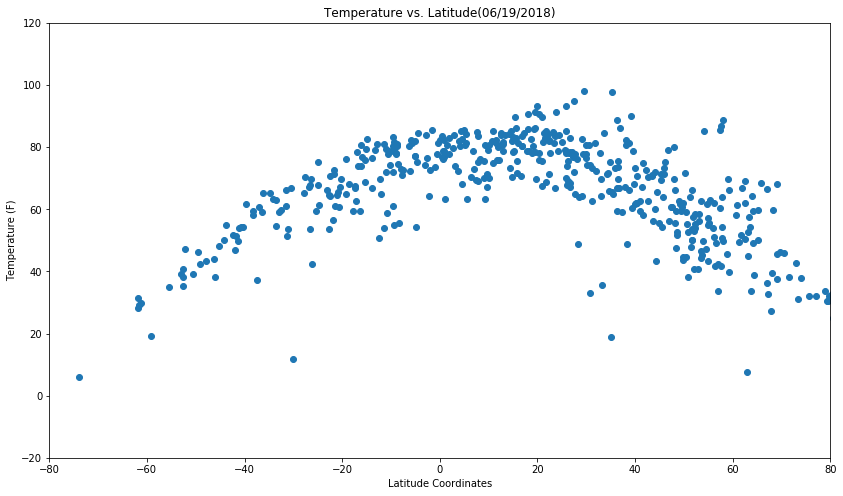

In [26]:
plt.scatter(dep_var, city_data.temp)

pylab.ylim([-20,120])
pylab.xlim([-80, 80])


plt.xlabel("Latitude Coordinates")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.title("Temperature vs. Latitude(06/19/2018)")
plt.savefig("Temperature vs. Latitude(06/19/2018)")


pylab.rcParams['figure.figsize'] = (14,8)

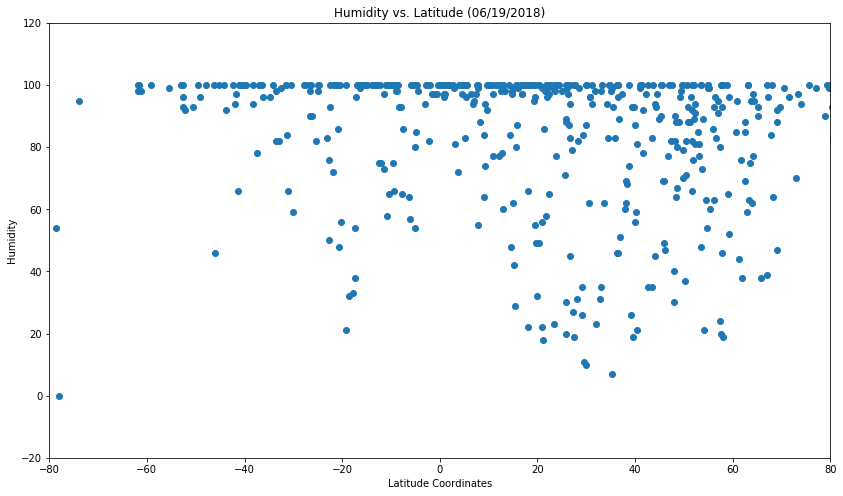

In [27]:
plt.scatter(dep_var, city_data.humidity)

plt.ylim(-20, 120)
pylab.xlim([-80, 80])
plt.grid(True)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (06/19/2018)")
plt.savefig("Humidity vs. Latitude (06/19/2018)")


pylab.rcParams['figure.figsize'] = (14,8)

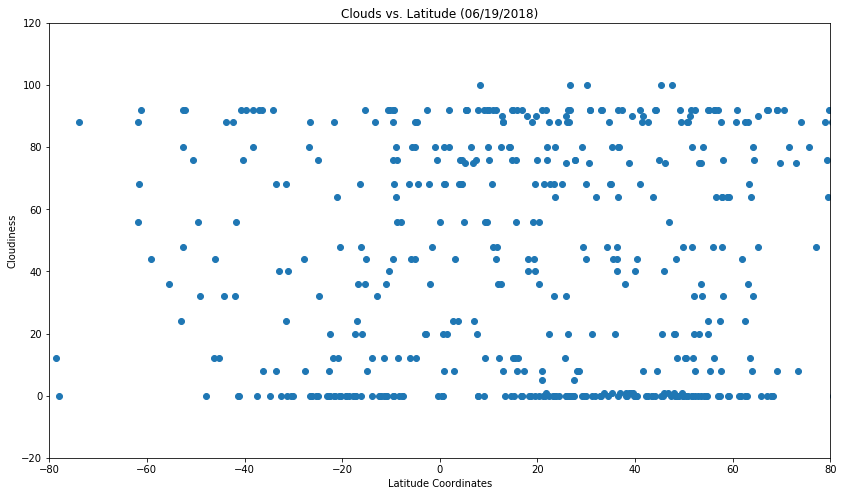

In [28]:
plt.scatter(dep_var, city_data.clouds)

plt.ylim(-20, 120)
pylab.xlim([-80, 80])
plt.grid(True)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Cloudiness")
plt.title("Clouds vs. Latitude (06/19/2018)")
plt.savefig("Clouds vs. Latitude (06/19/2018)")


pylab.rcParams['figure.figsize'] = (14,8)

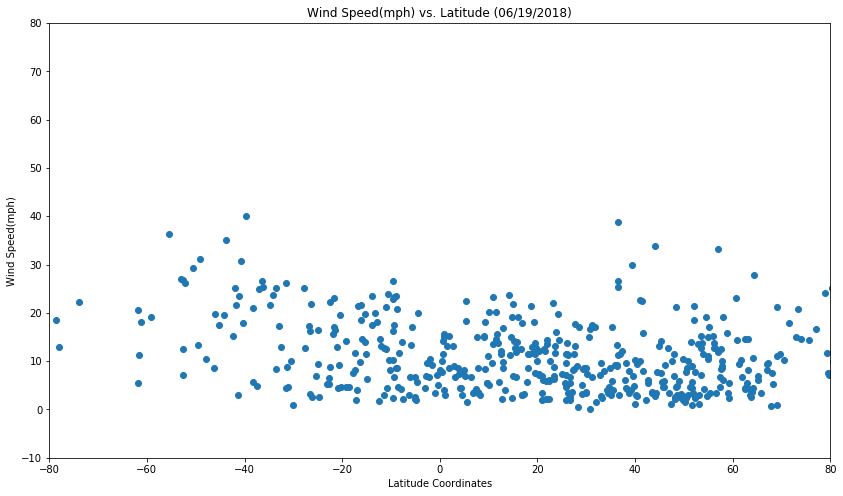

In [29]:
plt.scatter(dep_var, city_data.wind_speed)

plt.ylim(-10, 80)
pylab.xlim([-80, 80])
plt.grid(True)

plt.xlabel("Latitude Coordinates")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed(mph) vs. Latitude (06/19/2018)")
plt.savefig("Wind Speed(mph) vs. Latitude (06/19/2018)")


pylab.rcParams['figure.figsize'] = (14,8)